<a href="https://colab.research.google.com/github/datadigger01/inter_trade/blob/master/crossvalidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Classification Model

In [3]:
# 카드 default 여부를 예측하는 classification 모형

df = pd.read_csv("/content/drive/MyDrive/AI와무역투자론/Data/default_credit_card.csv")
df.set_index('Cust_ID', inplace=True)

df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


### Predictors/Features , Target/Label 변수 구분

In [4]:
# Variable/Feature Selection
features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
           'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# target
label = ['default_YN']

In [154]:
## Train 데이터 60% , Validation 데이터 20%, Test 데이터 20%로 구분

#from sklearn.model_selection import train_test_split
# Split Data : Train 60%, Validation 20%, Test 20%
#Train, Holdout = train_test_split(df, test_size=0.4, random_state=365)
#Validation, Test = train_test_split(Holdout, test_size=0.5, random_state=365)

#print("Train:",Train.shape)
#print("Validation:",Validation.shape)
#print("Test:",Test.shape)

In [16]:
from sklearn.model_selection import validation_curve

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [17]:
# RandomForest
rf_m = RandomForestClassifier()

# rf_m = RandomForestClassifier().fit(df[features], df[label])

In [18]:
# max_depth  --> overfitting check by the max_depth
param_range = [2,4,6,8,10,12,14,16,18]


# n_estimators
# param_range = [50, 100, 150, 200, 250, 300, 350, 400]
# max_leaf_nodes
# param_range = [5, 10, 15, 20, 25, 30, 35, 40]

train_scores, validation_scores = validation_curve(estimator= rf_m
                                            ,X=df[features]
                                            ,y=df[label]
                                            ,param_name ='max_depth'
                                           ,param_range = param_range
#                                           ,param_name ='n_estimators'
                                            ,cv=3
)
train_scores
validation_scores

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([[0.8003, 0.8033, 0.7994],
       [0.8039, 0.8121, 0.8146],
       [0.8085, 0.8174, 0.8186],
       [0.8098, 0.8241, 0.825 ],
       [0.8107, 0.8227, 0.8246],
       [0.8083, 0.8223, 0.8247],
       [0.8088, 0.8225, 0.8232],
       [0.809 , 0.8215, 0.8231],
       [0.8076, 0.8241, 0.8227]])

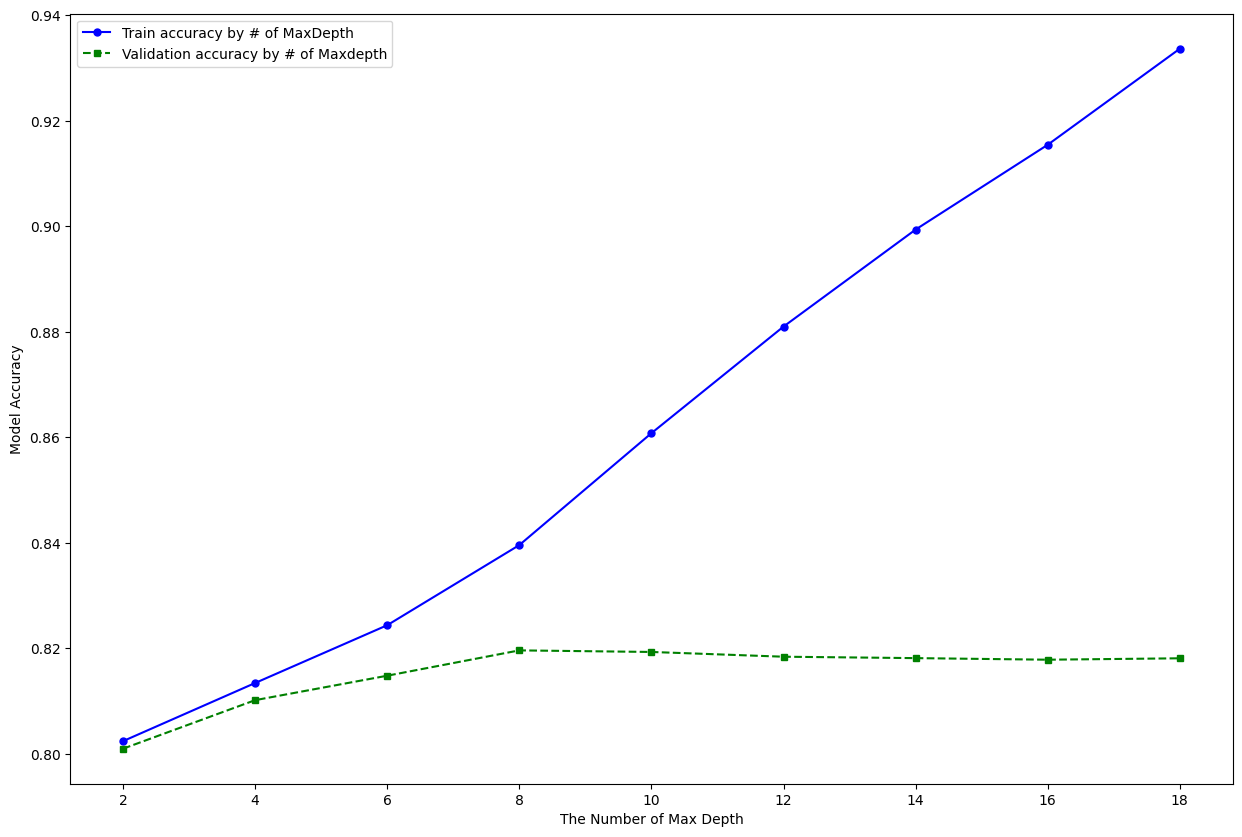

In [21]:
plt.figure(figsize=(15,10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(validation_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Train accuracy by # of MaxDepth')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy by # of Maxdepth')
plt.xlabel('The Number of Max Depth')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

## Cross Validation in Classification Model

In [23]:
# RandomForest
best_rm_model = RandomForestClassifier(max_depth=8)

# K-fold 설정

In [80]:
from sklearn.model_selection import KFold, StratifiedKFold

#K_fold = KFold(n_splits=5)
SK_fold = StratifiedKFold(n_splits=5)

## 설정된 K-fold 기반으로 Training과 Test

In [81]:
from sklearn.model_selection import cross_val_score

result = cross_val_score(best_rm_model, df[features], df[label], cv=SK_fold)
result

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

array([0.80766667, 0.81083333, 0.8225    , 0.835     , 0.82533333])

In [82]:
cross_val_result = pd.DataFrame(result, columns=['Accuracy'])
cross_val_result.mean()

Accuracy    0.820267
dtype: float64

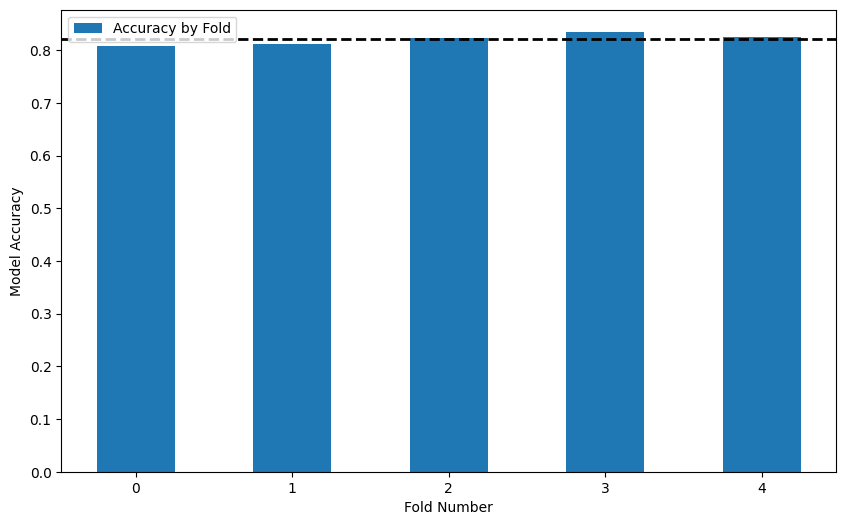

In [83]:
from matplotlib import colors
plt.figure(figsize=(10,6))

plt.bar(cross_val_result.index, cross_val_result.Accuracy, width=0.5, label='Accuracy by Fold')
plt.axhline(result.mean(), color='black', linestyle='--', linewidth=2)

plt.xlabel('Fold Number')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

## Cross Validation in TimeSeries Forecsting Model

In [84]:
df2 = pd.read_csv("/content/drive/MyDrive/AI와무역투자론/Data/Bike_sharing_Tr.csv", parse_dates=['datetime'])
#df2 = pd.read_excel()

# index columns 따로 설정
df2.set_index('datetime', inplace=True)
df2

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [100]:
#target_map = df2['count'].to_dict()
#df2['lag_1]='(df2.index - pd.Timedelta('14 days')).map(target_map)
#from pandas.tseries.offsets import DateOffset
#df2['lag_1']=(df2.index - DateOffset(days=14)).map(target_map)

df2['hour'] = df2.index.hour
df2['dayofweek'] = df2.index.dayofweek
#df2['month'] = df2.index.month
#df2['year'] = df2.index.year
#df2

In [101]:
TARGET='count'
FEATURES =['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed','hour','dayofweek']

## K-fold split in timeseries data

In [134]:
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5

In [135]:
tscv = TimeSeriesSplit(n_splits, test_size=24 * 5)  # Test Period: 10 days
df2 = df2.sort_index()

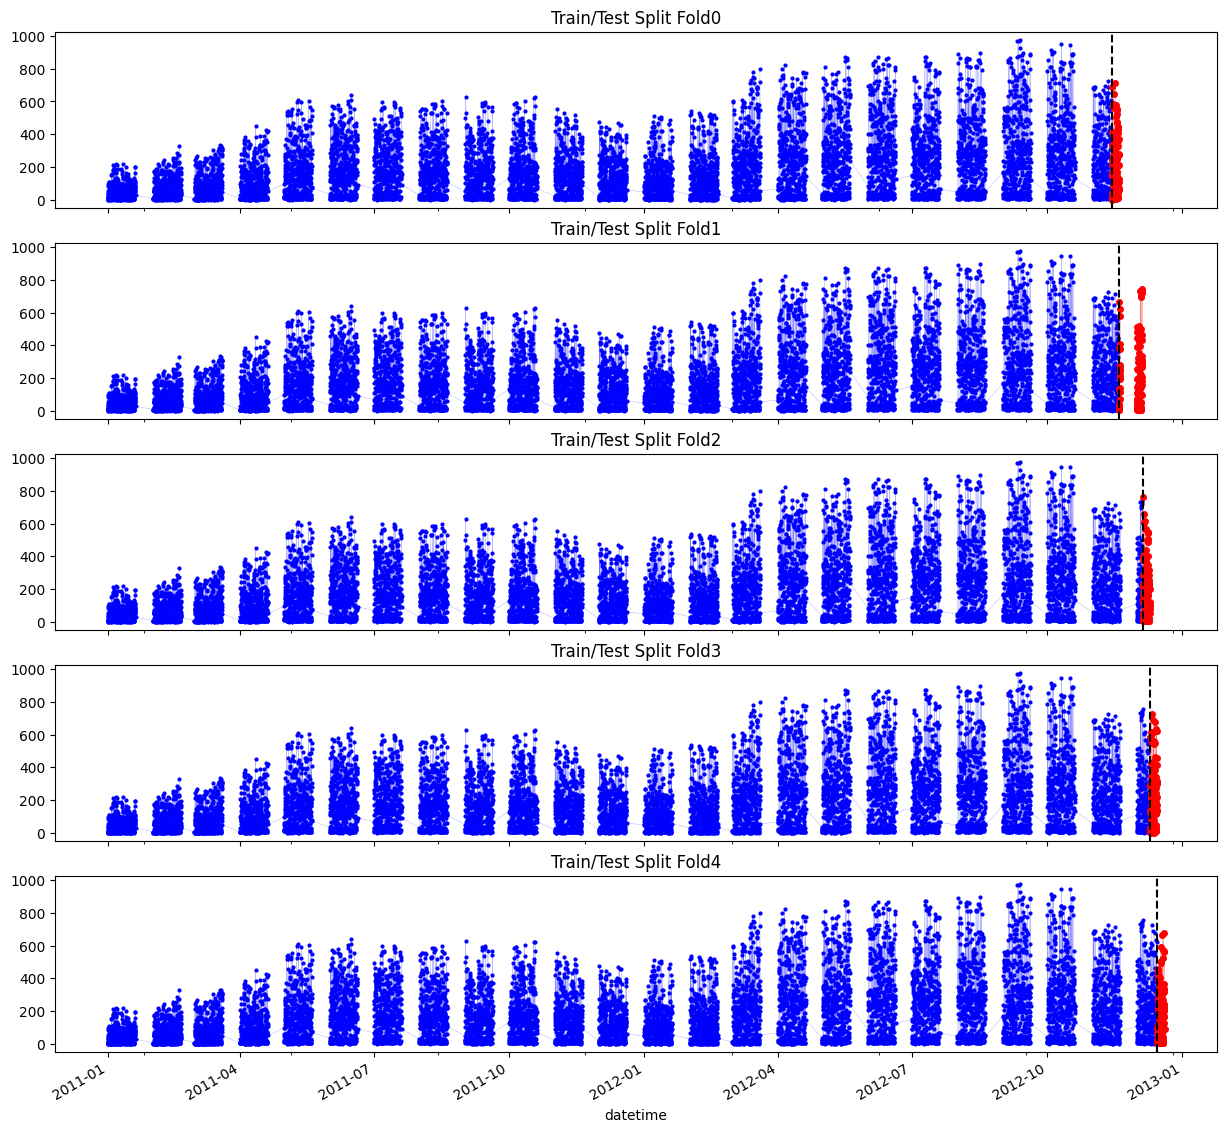

In [136]:
fig, axes = plt.subplots(n_splits,1, figsize=(15,15), sharex=True)

fold = 0
for train_idx, val_idx in tscv.split(df2):
    train = df2.iloc[train_idx]
    test  = df2.iloc[val_idx]
    train['count'].plot(ax=axes[fold],label='TrainSet', title=f'Train/Test Split Fold{fold}', marker='o',markersize=2, color='blue',linestyle='-',linewidth=0.1)
    test['count'].plot(ax=axes[fold],label='TestSet', marker='o',markersize=4, color='red',linestyle='-',linewidth=0.1)

    axes[fold].axvline(test.index.min(), color='black', ls='--')
    fold +=1

plt.show()

In [137]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [138]:
#reg_model = RandomForestRegressor(n_estimators=100, max_depth=8)
reg_model = GradientBoostingRegressor(n_estimators=100, max_depth=8)

In [139]:
from sklearn.model_selection import cross_val_score

# k-fold Cross Validation MSE for regression model
mse_kfold = cross_val_score(reg_model, df2[FEATURES], df2[TARGET], cv=tscv, scoring='neg_mean_squared_error')
print(mse_kfold)
# k-fold Cross Validation MAE for regression model
mae_kfold = cross_val_score(reg_model, df2[FEATURES], df2[TARGET], cv=tscv, scoring='neg_mean_absolute_error')
print(mae_kfold)

[-4510.85380913 -8645.02515847 -8701.45479976 -5518.26588704
 -2035.57917447]
[-50.29292831 -64.80281697 -62.59385949 -50.8448914  -30.60405797]


In [151]:
cross_val_MAE = pd.DataFrame(mae_kfold, columns=['MAE'])
cross_val_MSE = pd.DataFrame(mse_kfold, columns=['MSE'])
cross_val_forecast = pd.concat([cross_val_MAE, cross_val_MSE], axis=1)

print("Average Mean Abolute Error",cross_val_forecast.MAE.mean())
print("Average Mean Squared Error",cross_val_forecast.MSE.mean())

cross_val_forecast

Average Mean Abolute Error -51.827710829653526
Average Mean Squared Error -5882.235765774189


,MAE,MSE
0,-50.292928,-4510.853809
1,-64.802817,-8645.025158
2,-62.593859,-8701.454800
3,-50.844891,-5518.265887
4,-30.604058,-2035.579174


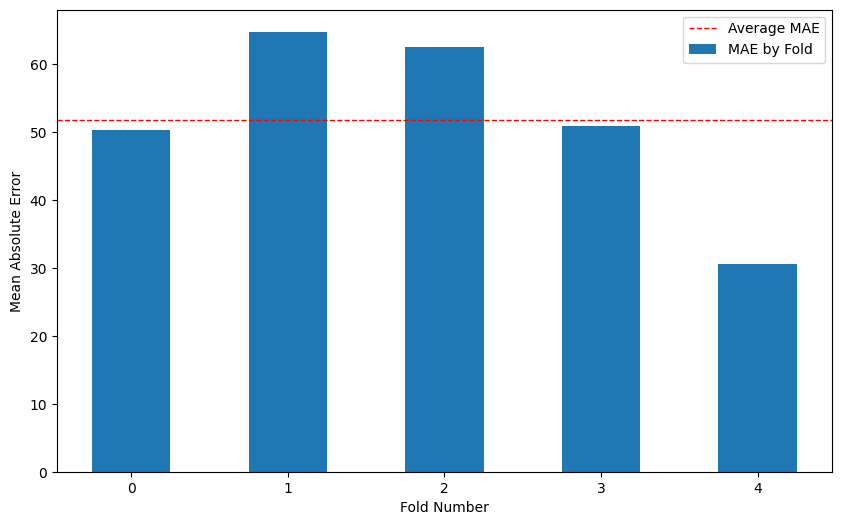

In [153]:
from matplotlib import colors
plt.figure(figsize=(10,6))

plt.bar(cross_val_forecast.index, -cross_val_MAE.MAE, width=0.5, label='MAE by Fold')
plt.axhline(-mae_kfold.mean(), color='red', linestyle='--', linewidth=1, label="Average MAE")

plt.xlabel('Fold Number')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()